Dataset link : https://www.kaggle.com/datasets/prathamtripathi/drug-classification Do visualization and analysis to understand the dataset (follow kaggle code for inspiration) Apply Random Forest Plot AUC-ROC curve *

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/drug200.csv')

In [10]:
# Check the data types, dimensions, and summary statistics
print(df.dtypes)
print(df.shape)
print(df.describe())

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object
(200, 6)
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
0


<AxesSubplot:>

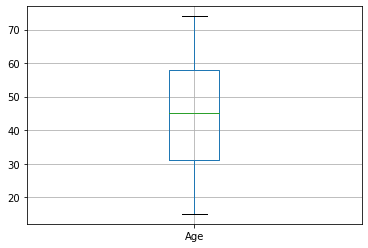

In [11]:
# Check for missing values, duplicate records, and outliers
print(df.isnull().sum())
print(df.duplicated().sum())
df.boxplot(column=['Age'])

**There is no Null Value  in the Data Set**

In [12]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# EDA for this dataset

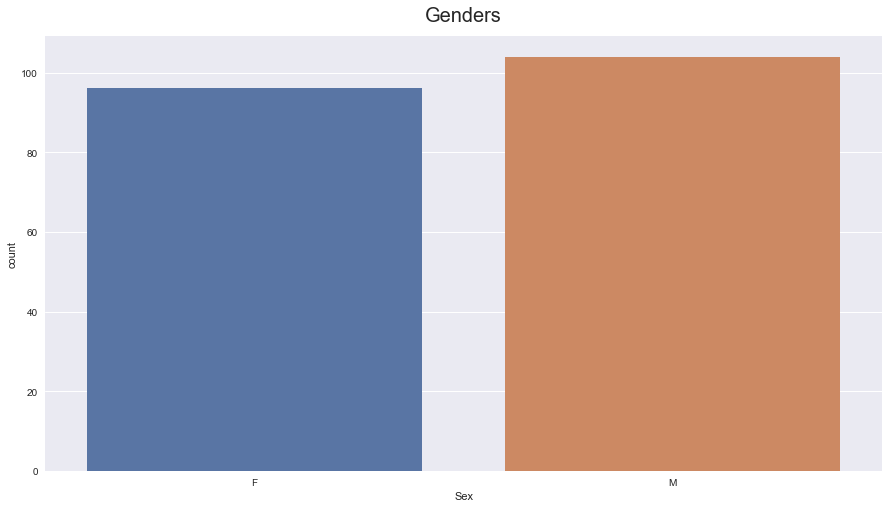

In [13]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
plt.title("Genders", fontsize=20, y=1.02)
sns.countplot(x = df.Sex, palette="deep")
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


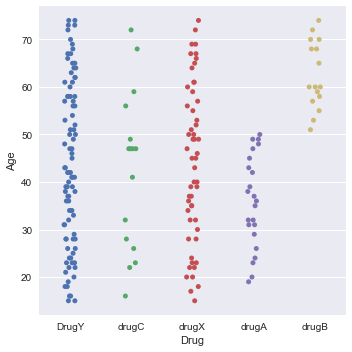

In [14]:
sns.catplot('Drug', 'Age', data = df)

**DrugY is most used for all ages.
DrugC frequency is low and is used for all ages.
DrugX is second highest frequency and is used for all ages.
Drug A appears only for people age 50 or lower.
Drug B appears only for people age 50 or higher.***
- Now checking whethere there is relation between Geneder and Drug

In [15]:
sex_drug = df.groupby('Sex').Drug.value_counts()
sex_drug

Sex  Drug 
F    DrugY    47
     drugX    27
     drugA     9
     drugC     7
     drugB     6
M    DrugY    44
     drugX    27
     drugA    14
     drugB    10
     drugC     9
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug'>

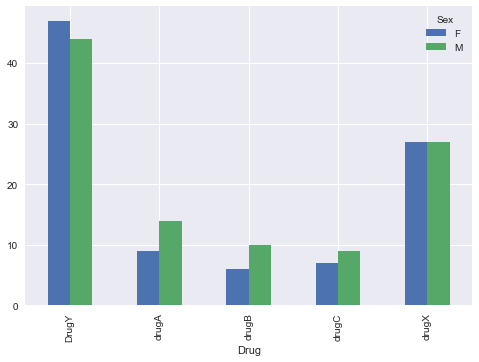

In [16]:
sex_drug.unstack(level=0).plot(kind='bar', subplots=False)

**Gender of patients is not correlated with their drug type.**

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


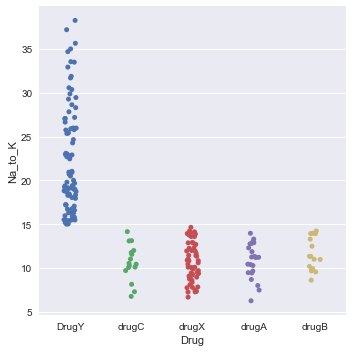

In [17]:
sns.catplot('Drug', 'Na_to_K', data=df)

**For na_to_k higher than 15, only drugY is used.
Rest drugs are used in 5 to 15 Na_to_k value range.**
- Now Checking the outliers

<AxesSubplot:xlabel='Age'>

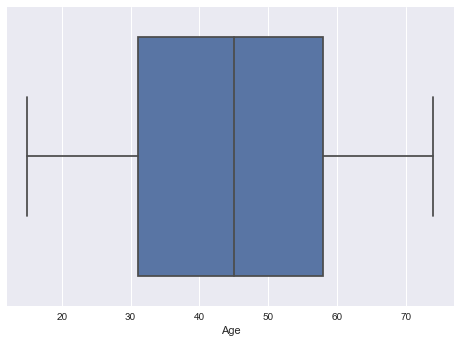

In [18]:
sns.boxplot(x=df['Age'])

**No outliers in gender**

<AxesSubplot:ylabel='Na_to_K'>

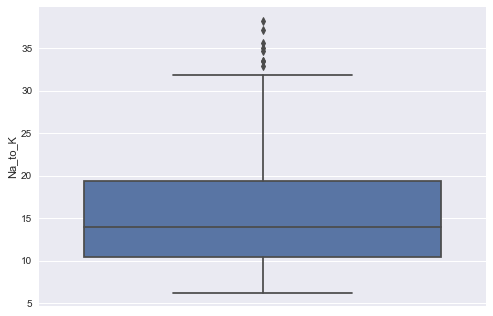

In [19]:
sns.boxplot(y=df['Na_to_K'])

In [20]:
df.drop(df[df.Na_to_K > 30].index, inplace=True)

<AxesSubplot:xlabel='Na_to_K'>

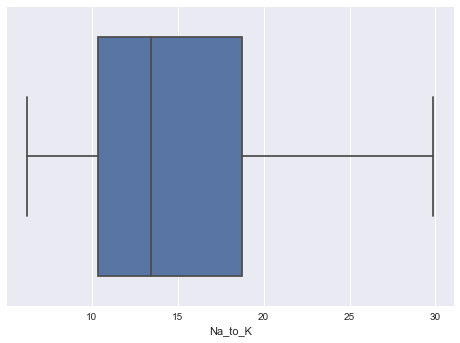

In [21]:
sns.boxplot(x=df['Na_to_K'])

In [22]:
df["Sex"] = df["Sex"].map({"M": 0, "F":1})
df["BP"] = df["BP"].map({"HIGH" : 3, "NORMAL" : 2, "LOW": 1})
df["Cholesterol"] = df["Cholesterol"].map({"HIGH": 1, "NORMAL" : 0})
df["Drug"] = df["Drug"].map({"DrugY": 0, "drugC": 1, "drugX": 2, "drugA":3, "drugB":4})

<AxesSubplot:>

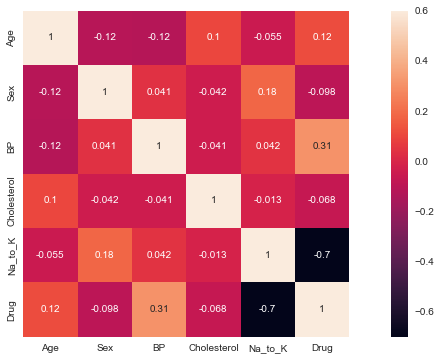

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

- BP is positively correlated with Drug type.
- Na_to_K is highly negatively correlated with drug type.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


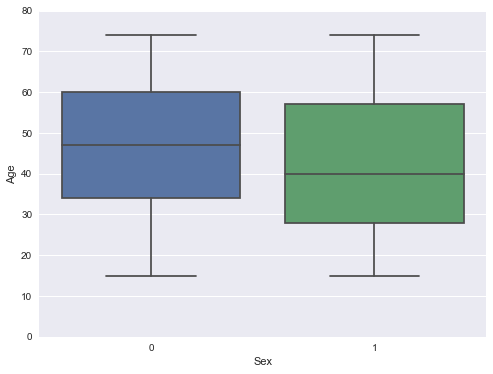

In [24]:
plt.figure(figsize = (8,6))
ax = sns.boxplot('Sex', 'Age', data = df).set(ylim = (0, 80))

**Distribution of patients age compared to gender is pretty simillar.**

# Feature Engineering
- Drop of column Sex, since in EDA we saw it didin't had any affect on target feature.

In [25]:
#ML Algorithms 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [26]:
df=pd.read_csv('data/drug200.csv')

In [27]:
#dropping sex as it has no correlation with drugs
df.drop('Sex', axis=1, inplace=True)

In [28]:
df

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,HIGH,HIGH,25.355,DrugY
1,47,LOW,HIGH,13.093,drugC
2,47,LOW,HIGH,10.114,drugC
3,28,NORMAL,HIGH,7.798,drugX
4,61,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC
196,16,LOW,HIGH,12.006,drugC
197,52,NORMAL,HIGH,9.894,drugX
198,23,NORMAL,NORMAL,14.020,drugX


In [29]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

**Classification Prediction**

In [30]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name]) 

In [31]:
#Data split
from sklearn.model_selection import train_test_split

In [32]:
X=df.drop(columns='Drug')
y=df.Drug

In [33]:
label_encoder=LabelEncoder()
label_encoder.fit(df.Drug)
df.Drug = label_encoder.transform(df.Drug)
classes = label_encoder.classes_
classes

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [34]:
X=pd.get_dummies(X)

In [35]:
X

,Age,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,0,1,0
1,47,13.093,0,1,0,1,0
2,47,10.114,0,1,0,1,0
3,28,7.798,0,0,1,1,0
4,61,18.043,0,1,0,1,0
...,...,...,...,...,...,...,...
195,56,11.567,0,1,0,1,0
196,16,12.006,0,1,0,1,0
197,52,9.894,0,0,1,1,0
198,23,14.020,0,0,1,0,1


In [36]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [37]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (140, 7)
X_test shape: (60, 7)
y_train shape: (140,)
y_test shape: (60,)


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=1,n_estimators = 11, max_features = 3, random_state = 43)

rf.fit(X_train, y_train)

predict = rf.predict(X_test)

predict

array(['drugB', 'drugX', 'drugX', 'drugX', 'drugB', 'DrugY', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugC',
       'drugX', 'drugX', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX',
       'drugA', 'DrugY', 'DrugY', 'drugX', 'drugB', 'DrugY', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugB', 'drugX', 'drugX', 'drugA',
       'drugC', 'drugC', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugC',
       'DrugY', 'DrugY', 'drugX', 'drugX', 'drugC', 'drugX', 'DrugY',
       'DrugY', 'drugA', 'drugA', 'DrugY'], dtype=object)

In [39]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predict)

print(report)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       0.80      1.00      0.89         4
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         9
       drugX       1.00      1.00      1.00        16

    accuracy                           0.98        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.99      0.98      0.98        60



In [40]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predict)
print('accuracy_score: ', acc)

accuracy_score:  0.9833333333333333


In [41]:
rf_train_score = rf.score(X_train, y_train)

rf_test_score= rf.score(X_test, y_test)

print('Random Forest Classifier Train Score is : ' , rf_train_score)

print('Random Forest Classifier Test Score is : ' , rf_test_score)

Random Forest Classifier Train Score is :  1.0
Random Forest Classifier Test Score is :  0.9833333333333333


In [42]:
from sklearn import  metrics

rf_acc = 100*rf.score(X_test, y_test)
print('Random Forest Classifier Predictions : \n', rf.predict(X_test), '\n Accuracy:', rf_acc, '%')

Random Forest Classifier Predictions : 
 ['drugB' 'drugX' 'drugX' 'drugX' 'drugB' 'DrugY' 'DrugY' 'drugC' 'DrugY'
 'DrugY' 'DrugY' 'drugA' 'DrugY' 'drugC' 'drugX' 'drugX' 'DrugY' 'drugC'
 'DrugY' 'DrugY' 'DrugY' 'drugC' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'drugX' 'drugB' 'DrugY' 'DrugY' 'drugC'
 'DrugY' 'DrugY' 'drugB' 'drugX' 'drugX' 'drugA' 'drugC' 'drugC' 'drugX'
 'drugX' 'drugX' 'DrugY' 'drugC' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC'
 'drugX' 'DrugY' 'DrugY' 'drugA' 'drugA' 'DrugY'] 
 Accuracy: 98.33333333333333 %


In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

RF=OneVsRestClassifier(RandomForestClassifier(max_features=5))
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

5


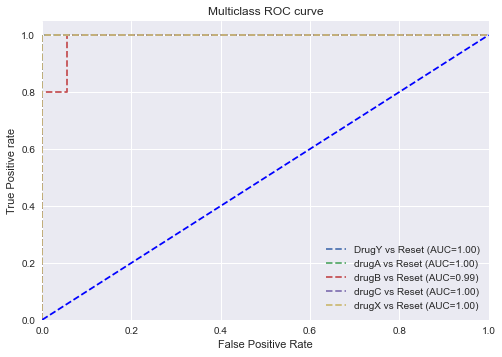

In [44]:
from sklearn.preprocessing import label_binarize


y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# ROC Curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
print(n_class)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #plotting
    plt.plot(fpr[i],tpr[i], linestyle='--',
            label='%s vs Reset (AUC=%0.2f)'%(classes[i], roc_auc[i]))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
fpr, tpr, thresholds = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

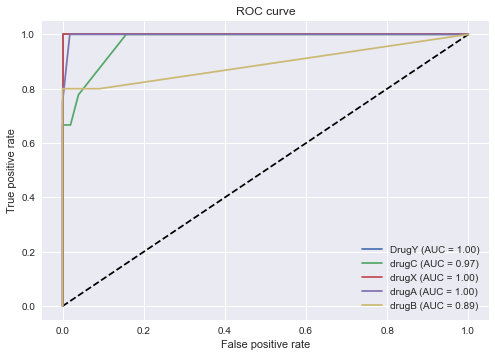

In [45]:
classifiers = {}
for class_name in y.unique():
    y_binary = (y_train == class_name).astype(int)
    rf = RandomForestClassifier(n_jobs=1,n_estimators = 11, max_features = 3, random_state = 43)
    rf.fit(X_train, y_binary)
    classifiers[class_name] = rf

# Predict probabilities for the test set
y_pred_proba = pd.DataFrame(columns=y.unique())
for class_name, clf in classifiers.items():
    y_pred_proba[class_name] = clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the ROC curve for each class
fprs, tprs, auc_scores = {}, {}, {}
for class_name in y.unique():
    y_binary_test = (y_test == class_name).astype(int)
    fprs[class_name], tprs[class_name], thresholds = roc_curve(y_binary_test, y_pred_proba[class_name])
    auc_scores[class_name] = auc(fprs[class_name], tprs[class_name])

# Plot the overall ROC curve and AUC for all classes
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for class_name in y.unique():
    plt.plot(fprs[class_name], tprs[class_name], label=f"{class_name} (AUC = {auc_scores[class_name]:.2f})")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [46]:
from joblib import dump, load
dump(RF, 'model_v1.joblib')

['model_v1.joblib']

In [47]:
clf = load('model_v1.joblib')
clf.predict([X_test.iloc[2]])

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with featur

array(['drugX'], dtype='<U5')

In [48]:
RF.predict([X_test.iloc[2]]) 

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with featur

array(['drugX'], dtype='<U5')

In [75]:
data=['10','10.8','HIGH','LOW']

In [84]:
BP=str(data[2])
Cholesterol=data[3]
print(BP,Cholesterol)

0 0
